In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Neural Network - Part I

# What Is a Neural Network?
Neural networks are signal-processing tools that are loosely based on the structure of the human brain. Neural networks are software routines that can “learn” from existing data and efficiently solve complex signal-processing problems. They are interesting to study and experiment with, and in some cases they far surpass the capabilities of “normal” algorithms. 

# What Is Perceptron?
A basic Perceptron neural network is conceptually simple. It can consist of nothing more than two input nodes and one output node joined by weighted connections:

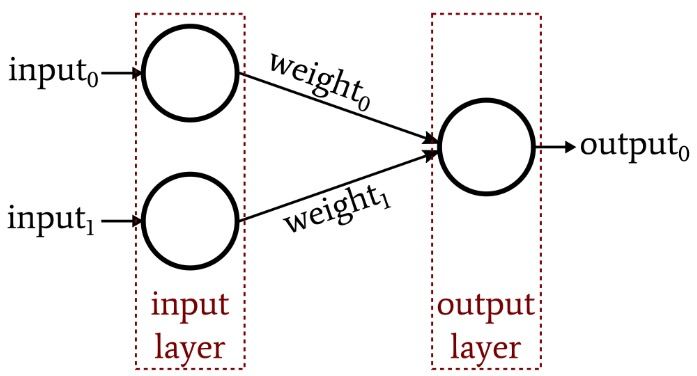


**The Dimensionality of the input data must match the Dimensionality of the input layer**, that is, if the input data—for example, a pattern that you want to classify—is a vector with a given length, and your input layer must have a node for each element in the vector.

If you’re trying to classify a pattern represented by a series of 20 data points, you have a 20-element vector and need 20 input nodes.

In the above figure the input is a vectorof two elements and hence the Perceptron has two Input nodes and one Output node.

An output node generates data that is of interest to the designer. The number of output nodes depends on the application. 

**If you want to make a yes/no classification decision, you only need one output node, even if there are hundreds of input nodes.**

**On the other hand, if the goal is to place an input vector into one of several possible categories (such as a Multi-Category classification (three categories of Iris flower), you will have multiple output nodes.**

**Data that move from one node to another are multiplied by weights**. These ordinary scalar values are actually the key to the Perceptron’s functionality.

**The weights are modified during the training process, and by automatically adjusting its weights in accordance with the patterns contained in the training data, the network acquires the ability to produce useful output.**


# What Happens Inside a Node?

The nodes in the input layer are just connection points; they don’t modify the input data. The output layer, as well as any additional layers between input and output, contain the network’s computational nodes. 

### When numerical data arrive at computational nodes, first they are summed, and then they are subjected to an “activation” function:

The figure below shows a basic threshold function that outputs 1 when the input is greater than the threshold and 0 otherwise.

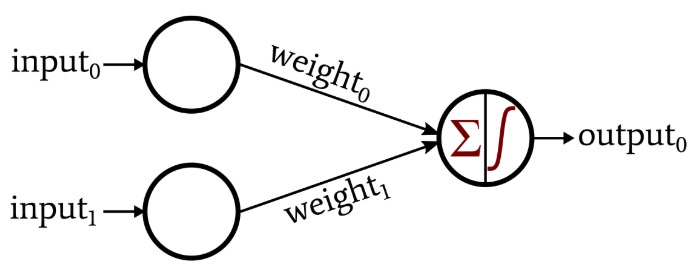


The concept of activation is similar to the behavior of (biological) neurons, which communicate via action potentials that are either active or inactive.

It is more like an **on/off digital system than an analog system**. In Artificial Neural Networks, nodes—which are also called (Artificial) neurons, can imitate neuronal behavior by applying a threshold function that outputs 1 when the input is greater than the threshold and 0 otherwise.

The following plot conveys the input–output relationship of the basic **“Unit Step” Activation Function.**

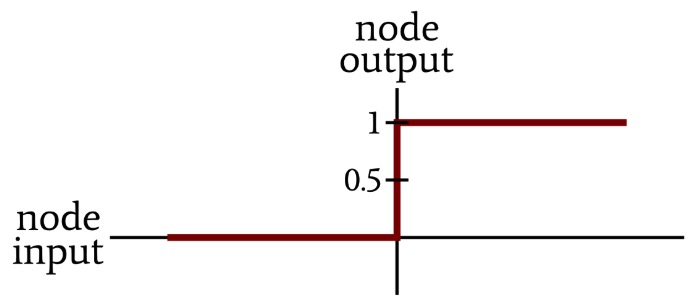

# What Is a Single-Layer Perceptron?
In the above section we saw that a neural network consists of interconnected nodes arranged in layers. The nodes in the input layer distribute data, and the nodes in other layers perform summation and then apply an activation function. The connections between these nodes are weighted, meaning that each connection multiplies the transferred datum by a scalar value.

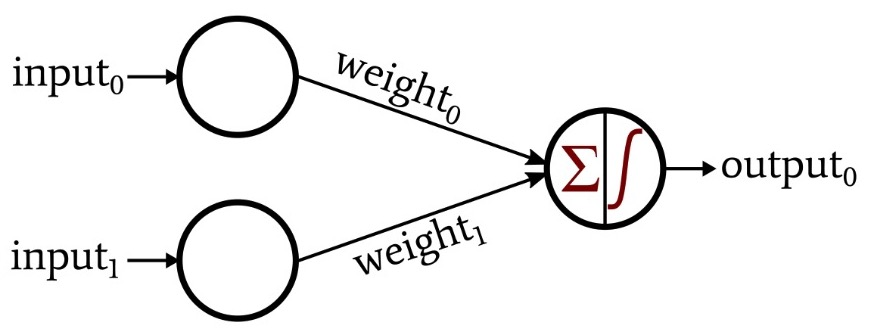

This configuration is called a **Single-Layer Perceptron** since it has only one layer that contains **computational nodes.**

# How to Train a Single-Layer Perceptron for Classification Modeling
In the previous section we saw a straightforward classification task (Category = 0 or Category = 1, Recall the "Will buy Insurance or Will Not buy Insuarnce depending on age" problem in Logistic Regression. 


Below is the Neural Network: 

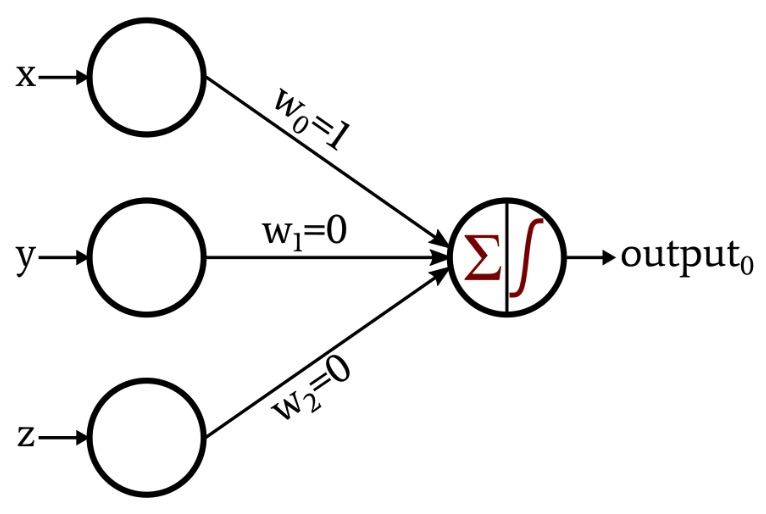

The activation function in the output node is the unit step:

 ## F(x) = 0 if x < 0, 1 if x >= 0
 
Below is some Python code that will aumatically assign the weights is a process called **Training the Perceptron** and the **Weighted Perceptron** will look as below

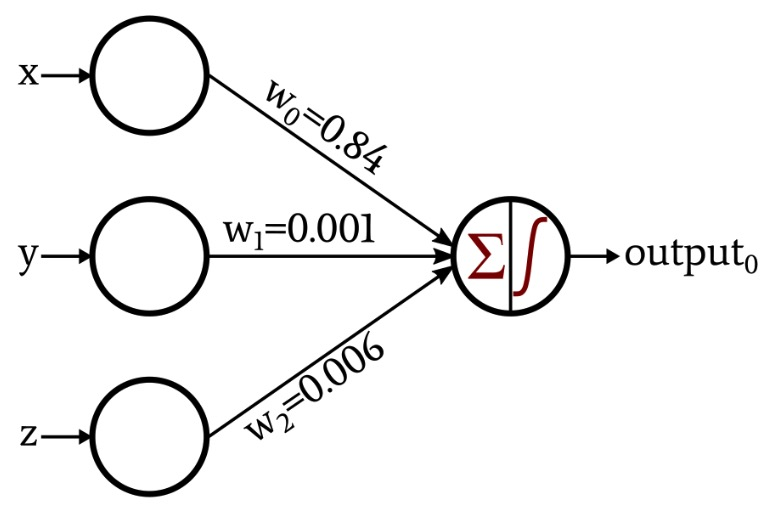

## The following code shows the basic steps of Training a Single Layer Perceptron

In [8]:
import pandas
import numpy as np


input_dim = 3

learning_rate = 0.01


Weights = np.random.rand(input_dim)

#Weights[0] = 0.5

#Weights[1] = 0.5

#Weights[2] = 0.5

Training_Data = pandas.read_csv("c:/users/utpal/desktop/Dataset1.csv")

# Training_Data.tail(10)

Expected_Output = Training_Data.output

Training_Data = Training_Data.drop(['output'], axis=1)

Training_Data = np.asarray(Training_Data)

training_count = len(Training_Data[:,0])

print(training_count)


for epoch in range(0,5):

    for datum in range(0, training_count):

        Output_Sum = np.sum(np.multiply(Training_Data[datum,:], Weights))

        if Output_Sum < 0:

            Output_Value = 0

        else:

            Output_Value = 1   

        error = Expected_Output[datum] - Output_Value

        for n in range(0, input_dim):

            Weights[n] = Weights[n] + learning_rate*error*Training_Data[datum,n] 


print("w_0 = %.3f" %(Weights[0]))

print("w_1 = %.3f" %(Weights[1]))    

print("w_2 = %.3f" %(Weights[2])) 

1000
w_0 = 1.270
w_1 = -0.102
w_2 = -0.020


# Let's walk through the steps of the code 

In [4]:
input_dim = 3
learning_rate = 0.01

## As mentioned before the Dimensionality of the Perceptron is adjustable. The thumb rule is the number of input node is the same as the dimensionality

## Learning Rate is the rate at which the Percetron learns. This is also adjustable. We will explore Learning Rate more later in the notebook

In [5]:
Weights = np.random.rand(input_dim)

#Weights[0] = 0.5

#Weights[1] = 0.5

#Weights[2] = 0.5

## Weights are typically initialized to random values. 

## However, the initial weight values influence the final weight values produced by the training procedure.

## So if you want to evaluate the effects of other variables (such as training-set size or learning rate), you can set all the weights to a known constant instead of a randomly generated number and then change them to different start values to see their effect

In [6]:
Training_Data = pandas.read_csv("c:/users/utpal/desktop/Dataset1.csv")
# Training_Data.tail(10)

## Read in the Training data set. You can read the Head or the Tail of the Training_Data to make sure that the data read in looks correct

## Few words about how the Training Dataset was created
* ### The data Set has three input columns X, Y and Z each with 1000 rows
* ### Values of X, Y and Z are generated using Excel RANDBETWEEN (-10, 10) instruction that generaes 1000 data elements for each columns (independently) with values in the Range (-10 and 10)
* ### These input values (properly adjusted) can be three attributes such as Shape, Taste, Density of a fruit and train the Perceptron to categorize the fruit as the Output
* ### The Output is generated using a Excel Function (IF(A2 <0, 0,1) i.e. if the Input X is < 0 then the Output is 0, else the Output is 1

In [7]:
Expected_Output = Training_Data.output

Training_Data = Training_Data.drop(['output'], axis=1)

Training_Data = np.asarray(Training_Data)

training_count = len(Training_Data[:,0])

print(training_count)

1000


* ### Known/Expected Output is the output column of the spreadsheet/data frame
* ### The output column is now removed from the Training_Dataset
* ### training_count is the length of the Output column which is 1000 as expected

# Now let's look at the calculation steps

In [2]:
 # for epoch in range(0,5):

### The length of one training session is governed by the number of training data available. However, you can continue optimizing the weights by training the network multiple times using the same data set—the benefits of training don’t disappear simply because the network has already seen these training data. 

### Each complete pass through the entire training set is called an epoch.

### So we will go through 6 passes of Training using the same dataset

In [9]:
 # for datum in range(0, training_count):

### Loop through the dataset of 1000 rows (same as the training_count calculated above)

In [10]:
Output_Sum = np.sum(np.multiply(Training_Data[datum,:], Weights))

### The output node must sum the values delivered by the three input nodes. 

### The code does this by first performing an element-wise multiplication of the Training_Data array and the Weights array and then calculating the summation of the elements in the array produced by that multiplication.

In [11]:
if Output_Sum < 0:
     Output_Value = 0
else:
     Output_Value = 1

### An if-else statement applies the unit-step activation function: (remember the "Step" Activation function we talked about a little while ago

### i.e. if the summation is less than zero, the value generated by the output node is 0; if the summation is equal to or greater than zero, the output value is one.

### Calculate the error of prediction by comparing the Actual/Expected Output value (which we have stored away in one of the previous steps) and the Predicted Output to the Actual Output value which we have 

In [12]:
error = Expected_Output[datum] - Output_Value

# Now we need to update the weights 

### Remember we started with random or preset values of the weights in the beginning of the code

### At the start of the code we started with randomly generated weights. We train the neural network (Perceptron) by repeatedly modifying the weights such that they gradually reflect the mathematical relationship between the input data and the desired output values. 

### Weight modification is accomplished by applying the following learning rule for each row in the training set:

#### weight(new) = weight(current) + (α * δ * Input) where
* #### α  = Learning Rate
* #### δ  = Output(expected/actual) - Output(calculated)
* #### Input = Value from the Input Node


In [9]:
for n in range(0, input_dim):

         Weights[n] = Weights[n] + learning_rate*error*Training_Data[datum,n]

### At the end of the Training Loop, Print the latest values of the three weigts

In [10]:
print("w_0 = %.3f" %(Weights[0]))

print("w_1 = %.3f" %(Weights[1]))    

print("w_2 = %.3f" %(Weights[2])) 

w_0 = 1.270
w_1 = -0.102
w_2 = -0.020
